# Template of  jupyter notebook for analysis of SAXS/WAXS/GiSAXS/GiWAXS

## Load package

In [1]:
%matplotlib notebook
from pyScatt.packages import *
plt.rcParams.update({'figure.max_open_warning': 0})
plt.rcParams.update({ 'image.origin': 'lower'   })
plt.rcParams.update({ 'image.interpolation': 'none'   })
T = True
F = False

## Define IO

In [8]:
inDir ='/home/yuzhang/NSLSII_Data_Link/CMS/2020_Cycle3/Test/Results/Stitched/SAXS/'
print('The input dir is: %s'%inDir)


The input dir is: /home/yuzhang/NSLSII_Data_Link/CMS/2020_Cycle3/Test/Results/Stitched/SAXS/


In [9]:
outDir = '/home/yuzhang/NSLSII_Data_Link/CMS/2020_Cycle3/Test/'
outDir = create_fullpath(  outDir )
outDir =  create_dir(  'Results/', outDir )
outDir_HDF =  create_dir(  'HDF_Results/', outDir )
outDir_PDF =  create_dir(  'PDF_Report/', outDir )

Directory  /home/yuzhang/NSLSII_Data_Link/CMS/2020_Cycle3/Test/  already exists
Directory  /home/yuzhang/NSLSII_Data_Link/CMS/2020_Cycle3/Test/Results/  already exists
Directory  /home/yuzhang/NSLSII_Data_Link/CMS/2020_Cycle3/Test/Results/HDF_Results/  already exists
Directory  /home/yuzhang/NSLSII_Data_Link/CMS/2020_Cycle3/Test/Results/PDF_Report/  already exists


## Organize Data 
* the sorting method heavly relies on data acquisition strategy
* Currently, there is no general method for sorting

In [11]:
username_ = 'SD'

#flist = ls_dir( inDir, and_list=[  username_,  ], no_list=[ 'Cell' ])
flist = ls_dir( inDir, and_list=[ username_  ], or_list = [ ])
#_, flists = sort_fnlist( flist,  cut_beg = -24, cut_end=-9, method = 'cut_from_end' ) #for waxs
flists = sorted( flist )
#flists_clean = drop_xyz_float_filenames( flists, pattern_characters = ['_x', '_y', '_z', '_w' ] )
flists_clean = flists
 
Nf = len( flists)
print('There are %s files for user: %s in this run.'%(Nf, username_))

There are 35 files for user: SD in this run.


In [12]:
flist

array(['SD_PSC_IEC3p6_Annealed_50_pos1_5234.1s_RH0.474_th0.050_10.00s_39343_stitched_saxs.tiff',
       'SD_PSC_IEC3p6_Annealed_50_pos1_5247.4s_RH0.469_th0.080_10.00s_39344_stitched_saxs.tiff',
       'SD_PSC_IEC3p6_Annealed_50_pos1_5260.4s_RH0.490_th0.100_10.00s_39345_stitched_saxs.tiff',
       'SD_PSC_IEC3p6_Annealed_50_pos1_5274.4s_RH0.474_th0.120_10.00s_39346_stitched_saxs.tiff',
       'SD_PSC_IEC3p6_Annealed_50_pos1_5288.4s_RH0.469_th0.150_10.00s_39347_stitched_saxs.tiff',
       'SD_PSC_IEC3p6_Annealed_50_pos1_5302.4s_RH0.469_th0.200_10.00s_39348_stitched_saxs.tiff',
       'SD_PSC_IEC3p6_Annealed_50_pos1_5316.4s_RH0.469_th0.250_10.00s_39349_stitched_saxs.tiff',
       'SD_PSC_IEC3p6_Annealed_50_pos1_11592.8s_RH27.895_th0.050_10.00s_39595_stitched_saxs.tiff',
       'SD_PSC_IEC3p6_Annealed_50_pos1_11605.9s_RH27.885_th0.080_10.00s_39596_stitched_saxs.tiff',
       'SD_PSC_IEC3p6_Annealed_50_pos1_11619.9s_RH27.869_th0.100_10.00s_39597_stitched_saxs.tiff',
       'SD_PSC_IEC3p6_An

In [13]:
flists_clean

['SD_PSC_IEC3p6_Annealed_50_pos1_11592.8s_RH27.895_th0.050_10.00s_39595_stitched_saxs.tiff',
 'SD_PSC_IEC3p6_Annealed_50_pos1_11605.9s_RH27.885_th0.080_10.00s_39596_stitched_saxs.tiff',
 'SD_PSC_IEC3p6_Annealed_50_pos1_11619.9s_RH27.869_th0.100_10.00s_39597_stitched_saxs.tiff',
 'SD_PSC_IEC3p6_Annealed_50_pos1_11632.9s_RH27.885_th0.120_10.00s_39598_stitched_saxs.tiff',
 'SD_PSC_IEC3p6_Annealed_50_pos1_11645.9s_RH27.906_th0.150_10.00s_39599_stitched_saxs.tiff',
 'SD_PSC_IEC3p6_Annealed_50_pos1_11658.9s_RH27.932_th0.200_10.00s_39600_stitched_saxs.tiff',
 'SD_PSC_IEC3p6_Annealed_50_pos1_11671.9s_RH27.948_th0.250_10.00s_39601_stitched_saxs.tiff',
 'SD_PSC_IEC3p6_Annealed_50_pos1_17944.1s_RH46.282_th0.050_10.00s_39847_stitched_saxs.tiff',
 'SD_PSC_IEC3p6_Annealed_50_pos1_17957.4s_RH46.272_th0.080_10.00s_39848_stitched_saxs.tiff',
 'SD_PSC_IEC3p6_Annealed_50_pos1_17971.4s_RH46.272_th0.100_10.00s_39849_stitched_saxs.tiff',
 'SD_PSC_IEC3p6_Annealed_50_pos1_17985.5s_RH46.288_th0.120_10.00s_3985

### Using a two-layered dict to sort the files 

In [7]:
#%run -i /home/yuzhang/Software/pyScatt/pyScatt/generic_functions.py

In [14]:
cut_pattern= r'(_saxs)'
#cut_pattern= r'(_0.)'
sam_dict, sams = get_Unique_SamDict_from_list( flists, sam_list_clean=flists_clean, 
                                               cut_pattern= cut_pattern, starting_point=  0     )   
#ks =  sorted(list(sams.keys()))
ks =   list(sams.keys())
N = len(ks)
print( 'There are %s samples.'%(N))

There are 35 samples.


In [15]:
sams

{'SD_PSC_IEC3p6_Annealed_50_pos1_11592.8s_RH27.895_th0.050_10.00s_39595_stitched': 1,
 'SD_PSC_IEC3p6_Annealed_50_pos1_11605.9s_RH27.885_th0.080_10.00s_39596_stitched': 1,
 'SD_PSC_IEC3p6_Annealed_50_pos1_11619.9s_RH27.869_th0.100_10.00s_39597_stitched': 1,
 'SD_PSC_IEC3p6_Annealed_50_pos1_11632.9s_RH27.885_th0.120_10.00s_39598_stitched': 1,
 'SD_PSC_IEC3p6_Annealed_50_pos1_11645.9s_RH27.906_th0.150_10.00s_39599_stitched': 1,
 'SD_PSC_IEC3p6_Annealed_50_pos1_11658.9s_RH27.932_th0.200_10.00s_39600_stitched': 1,
 'SD_PSC_IEC3p6_Annealed_50_pos1_11671.9s_RH27.948_th0.250_10.00s_39601_stitched': 1,
 'SD_PSC_IEC3p6_Annealed_50_pos1_17944.1s_RH46.282_th0.050_10.00s_39847_stitched': 1,
 'SD_PSC_IEC3p6_Annealed_50_pos1_17957.4s_RH46.272_th0.080_10.00s_39848_stitched': 1,
 'SD_PSC_IEC3p6_Annealed_50_pos1_17971.4s_RH46.272_th0.100_10.00s_39849_stitched': 1,
 'SD_PSC_IEC3p6_Annealed_50_pos1_17985.5s_RH46.288_th0.120_10.00s_39850_stitched': 1,
 'SD_PSC_IEC3p6_Annealed_50_pos1_17999.4s_RH46.282_th0

In [16]:
ks[0], sam_dict[ks[0]]

('SD_PSC_IEC3p6_Annealed_50_pos1_11592.8s_RH27.895_th0.050_10.00s_39595_stitched',
 ['SD_PSC_IEC3p6_Annealed_50_pos1_11592.8s_RH27.895_th0.050_10.00s_39595_stitched_saxs.tiff'])

##  Load Mask if has one

<IPython.core.display.Javascript object>


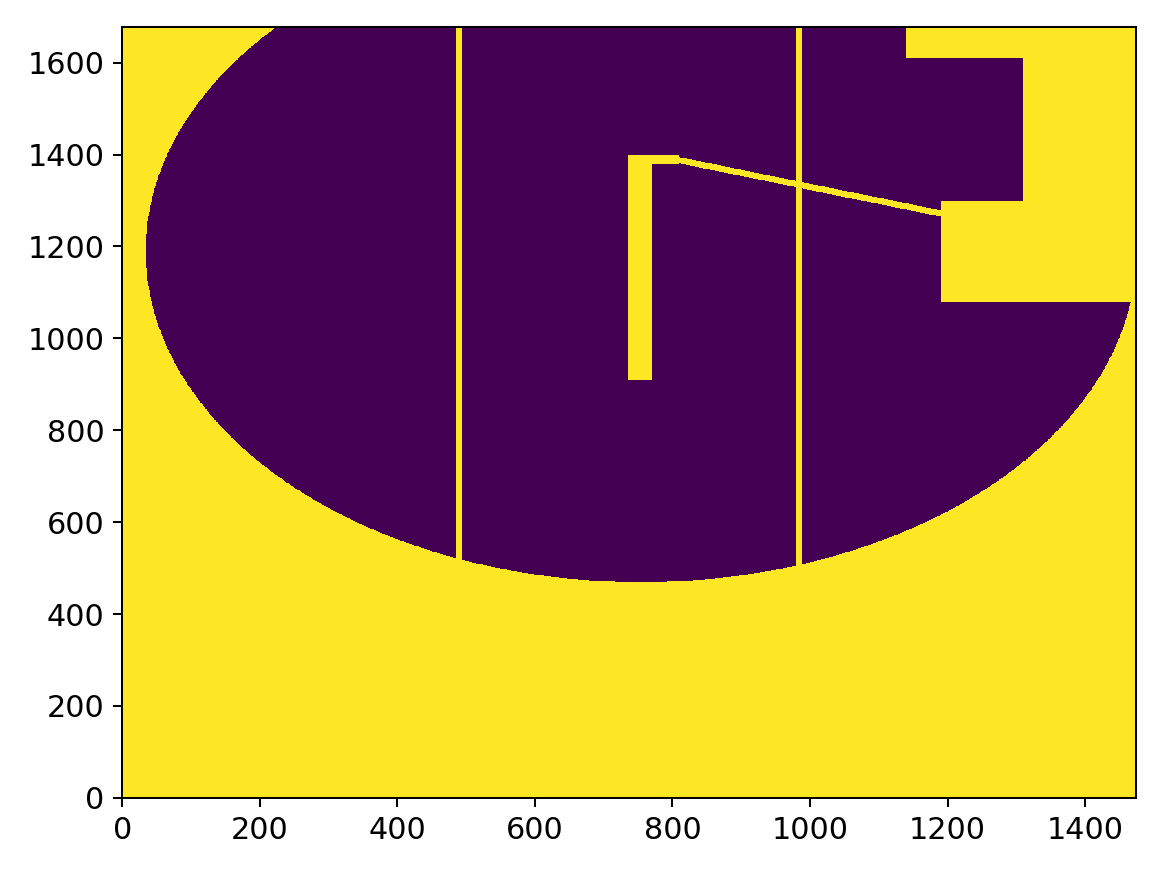

In [18]:
mask =np.load( '/home/yuzhang/NSLSII_Data_Link/CMS/2020_Cycle3/Dishari/Mask/' + 'mask_saxs_2020C3_SD_noygap_run1.npy')

show_img(mask)


## Define data analysis parameters and methods

### A GiSAXS

In [19]:
username = 'Test'
beamline = 'CMS'
cycle='2020_C3'


geometry   =  'Reflection'
det_str = 'Pilatus2m' 

wav_m = 1E-10 * (12.398/  13.5 )
sdd_mm =  5065.0  
b_xy = [754,  1189 ] # the first run
b_xy = [754,  1210 ] #the second and third run
bs_xy = [ 0, 50]   
incident_angle = 0
hotpixel_thres = 1e6
  
pargs_sc = dict( wav_m = wav_m, 
                sdd_mm = sdd_mm, 
                b_xy =b_xy, 
                bs_xy = bs_xy, 
                incident_angle = incident_angle,             
                det_str = det_str, 
                bs_kind = None, 
                useqx = True,
                geometry =  geometry,                
                username = username, 
                cycle =  cycle, 
                beamline = beamline, 
                outDir = outDir, )
              # mask = mask )
   
## Setup the class
SC = CMS_Scattering( pargs_sc  )
 


### Methods

In [20]:
do_plot = T #True 
#do_inpait = True, make it True, the circular average does not use inpaited data 
do_show_plot = T
save_raw = F
do_qimg = F
do_ciravg = F
save_raw= F
check_stitch = F
do_stitch = F
do_Qciravg = F
show_Qciravg_roi = F 
do_Qciravg_sector = F   
show_Qciravg_sector = F 
do_Qqphi = F 
do_q_qphi = F
do_p_qphi = F  


if T:    
    ###########################
    #for GiSAXS
    ###########################  
    do_plot_raw = T # True
    do_qimg = T
    
    do_linecut_qz = T #do qz-linecut, if qz_cuts is none, make cut at Yoneda wing
    qz_cuts= None # [0.04, 0.08, 0.15 ]
    q_wid = 0.0025  
    ang_ctl = 0.112  #for Si wafer at 16.1 keV 
    show_linecut_qz =   T
    do_linecut_qr = T #do qx-linecut
    qr_cuts= None # [0.04, 0.08, 0.15 ]
    show_linecut_qr =   T   
    
    
    
 
    

In [22]:
sample_list = ks[ 18:19  ]
#sample_list = ks   #use a dummy papemill to run this
print( sample_list, sam_dict[sample_list[0]]  )

['SD_PSC_IEC3p6_Annealed_50_pos1_24356.9s_RH71.063_th0.150_10.00s_40103_stitched'] ['SD_PSC_IEC3p6_Annealed_50_pos1_24356.9s_RH71.063_th0.150_10.00s_40103_stitched_saxs.tiff']


In [23]:
#ks

In [24]:
#sample_list,  sam_dict[sample_list[0]]

In [25]:
#%run -i /home/yuzhang/Software/pyScatt/pyScatt/Pipeline_Funcs.py

# Run the data analysis

The sample is: SD_PSC_IEC3p6_Annealed_50_pos1_24356.9s_RH71.063_th0.150_10.00s_40103_stitched.
The filelist for this sample is: ['SD_PSC_IEC3p6_Annealed_50_pos1_24356.9s_RH71.063_th0.150_10.00s_40103_stitched_saxs.tiff'].
The Directory  /home/yuzhang/NSLSII_Data_Link/CMS/2020_Cycle3/Test/Results/GISAXS/  is created.
The incident angle is: 0.15.


<IPython.core.display.Javascript object>


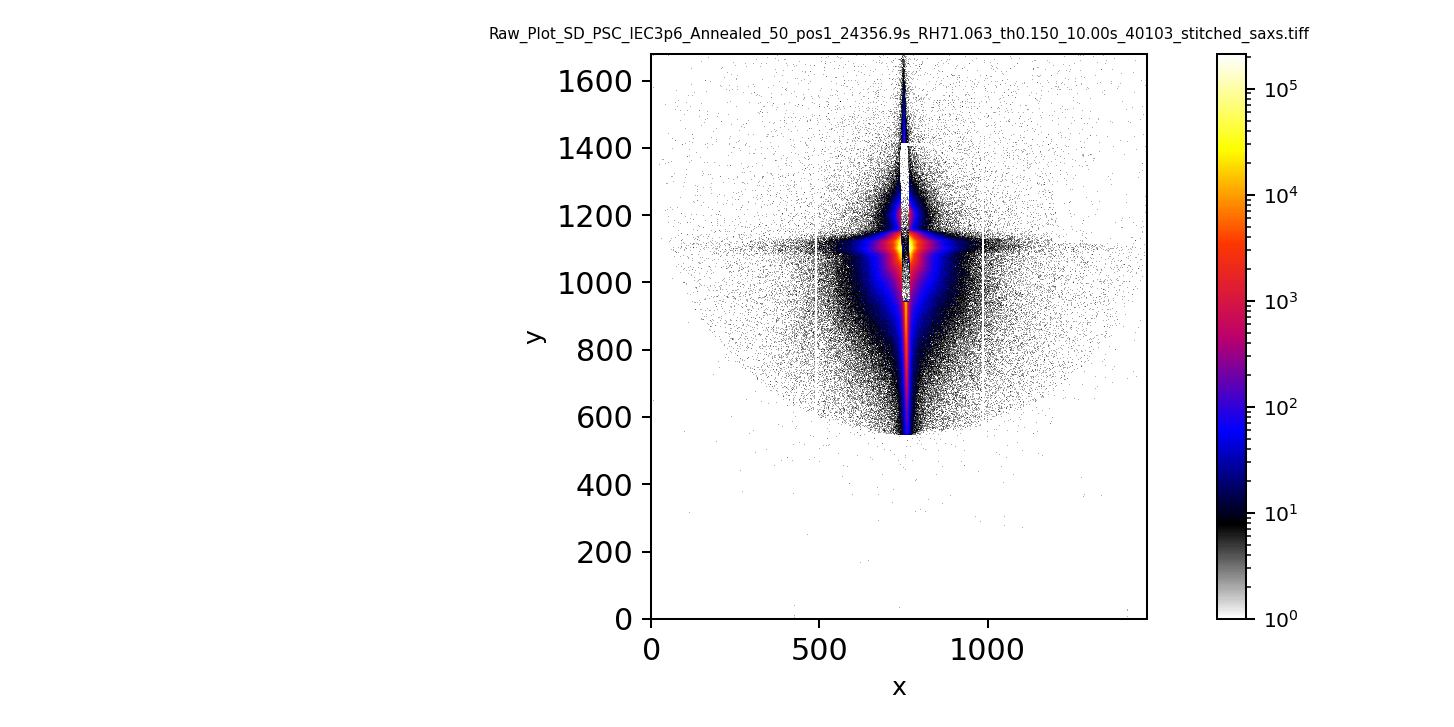

/home/group/Software/pyScatt/pyScatt/plots.py:66: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes.append( fig.add_subplot(H,V,i+1)    )


<IPython.core.display.Javascript object>


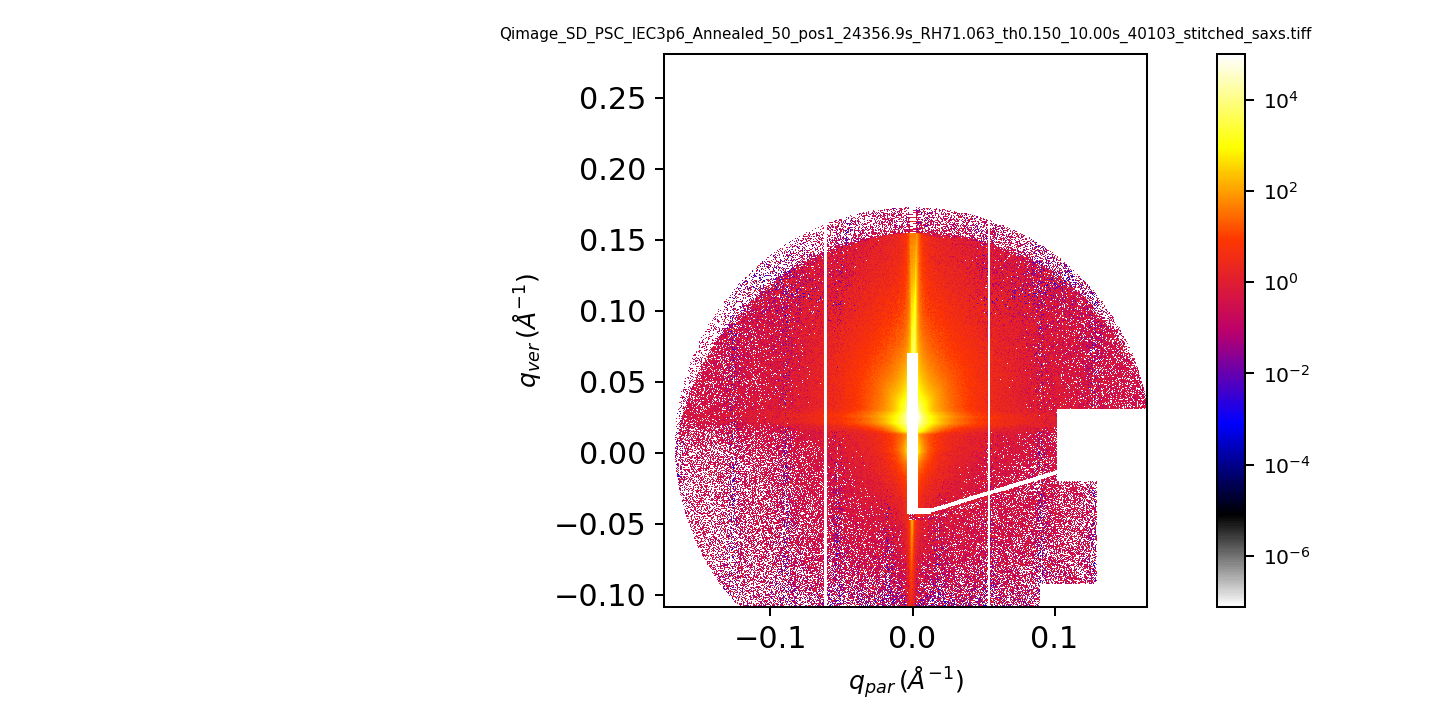

The file: Linecut_Hor_SD_PSC_IEC3p6_Annealed_50_pos1_24356.9s_RH71.063_th0.150_10.00s_40103_stitched_qh_cut_=0.028800000000000003_0.033800000000000004.csv is saved in /home/yuzhang/NSLSII_Data_Link/CMS/2020_Cycle3/Test/Results/GISAXS/Linecut_Hor/


/home/group/Software/pyScatt/pyScatt/generic_functions.py:642: RuntimeWarning: invalid value encountered in true_divide
  return sums/cts


<IPython.core.display.Javascript object>


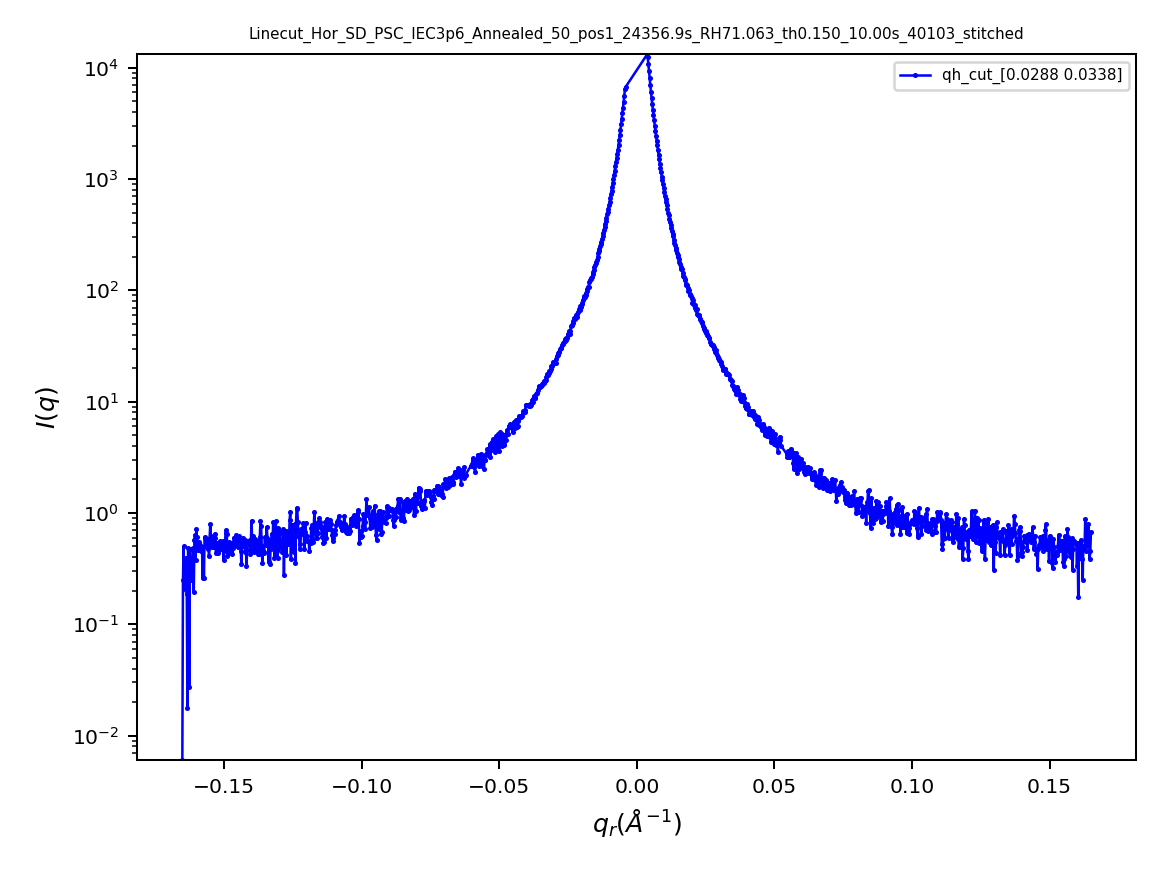

<IPython.core.display.Javascript object>


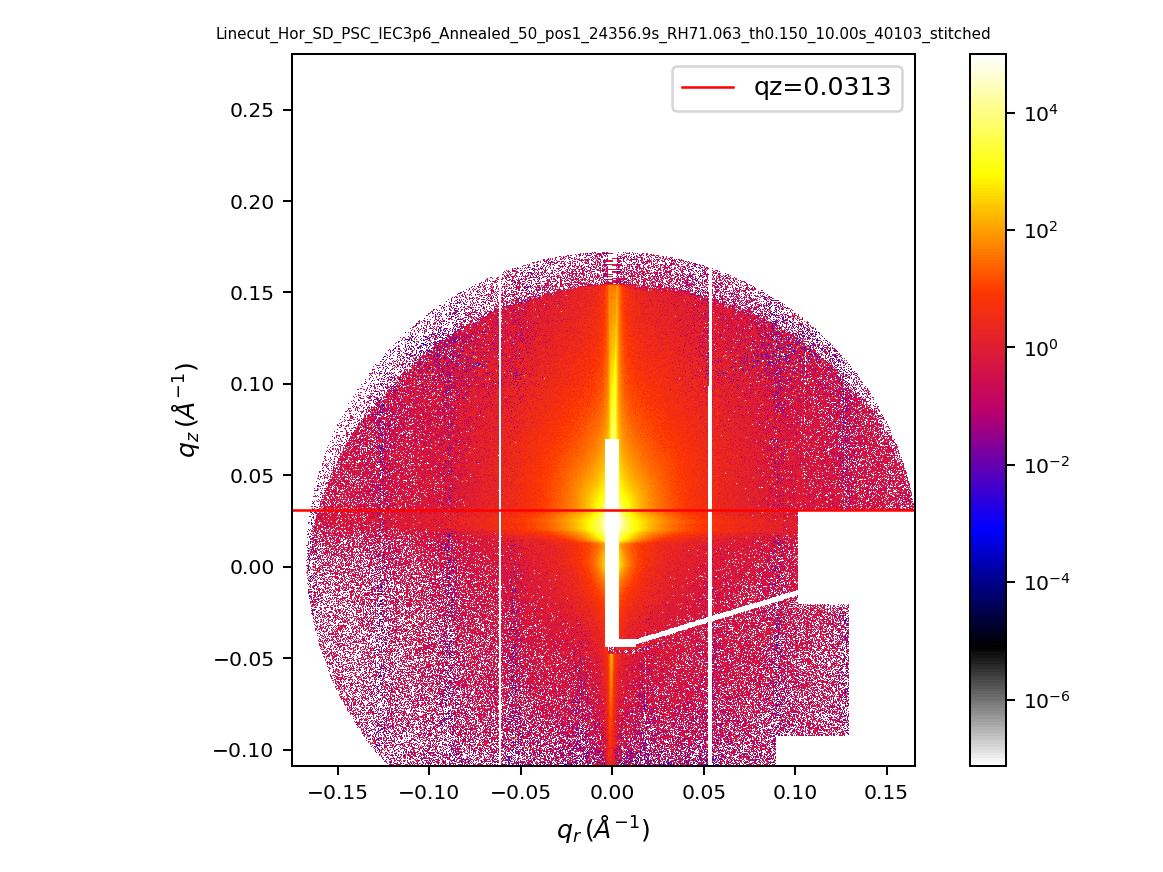

The file: Linecut_Ver_SD_PSC_IEC3p6_Annealed_50_pos1_24356.9s_RH71.063_th0.150_10.00s_40103_stitched_qv_cut_=0.028800000000000003_0.033800000000000004.csv is saved in /home/yuzhang/NSLSII_Data_Link/CMS/2020_Cycle3/Test/Results/GISAXS/Linecut_Ver/


/home/group/Software/pyScatt/pyScatt/generic_functions.py:642: RuntimeWarning: invalid value encountered in true_divide
  return sums/cts


<IPython.core.display.Javascript object>


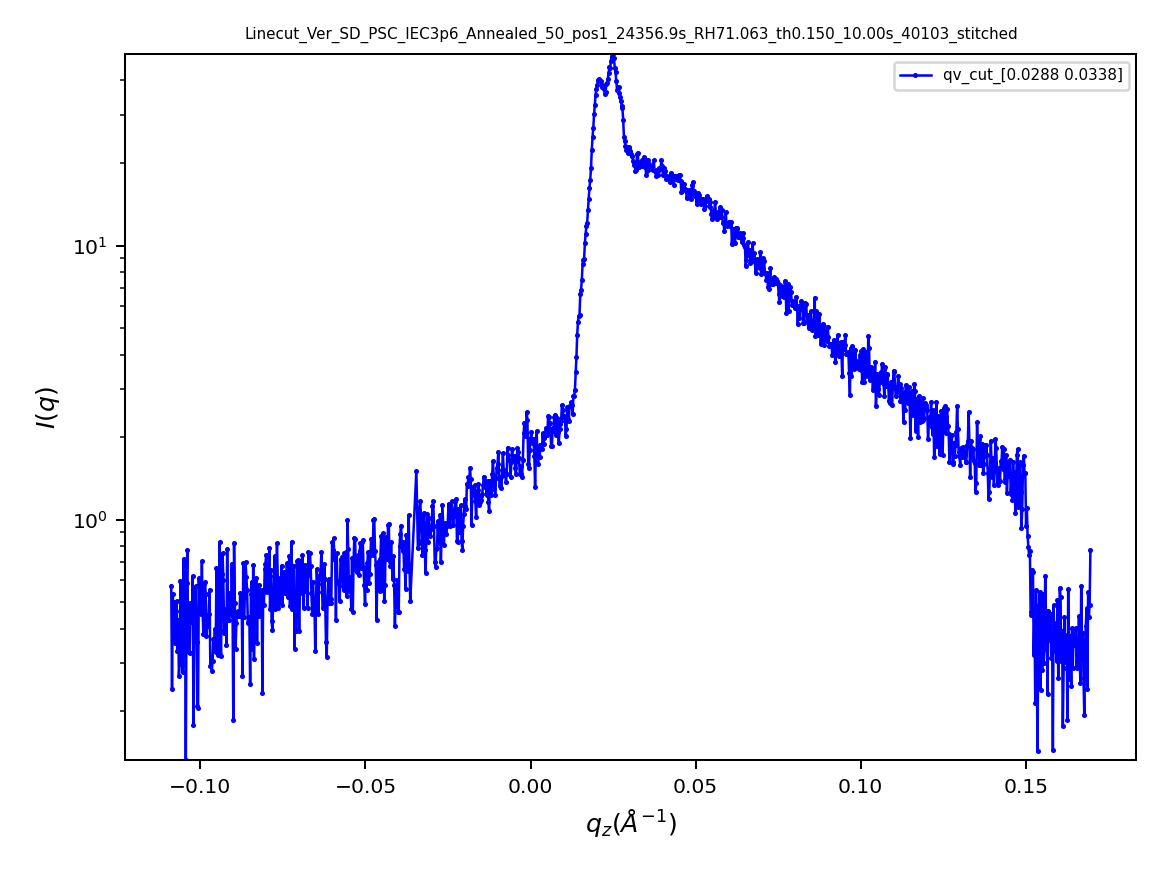

<IPython.core.display.Javascript object>


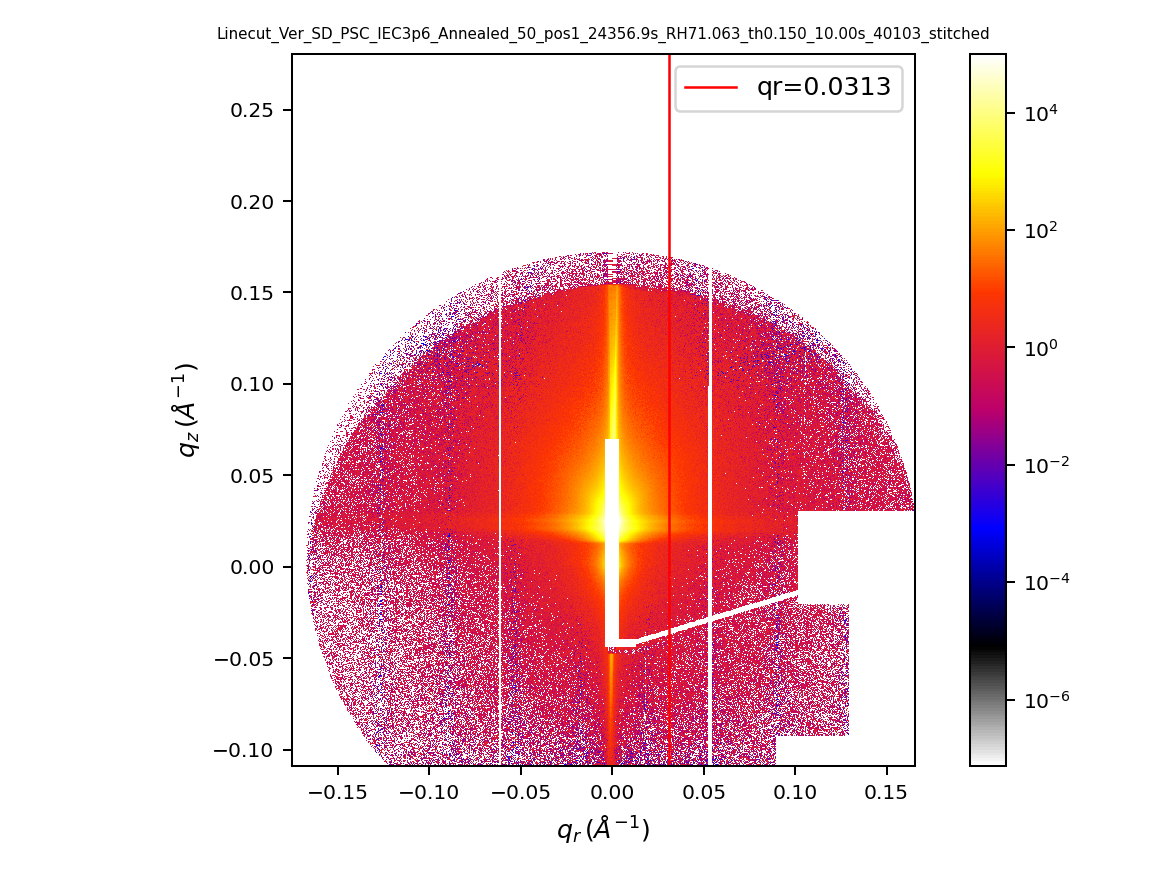

Done


In [26]:
#loop samples
for sam in sample_list:     
    print( 'The sample is: %s.'%sam) 
    fps = sam_dict[sam] 
    print( 'The filelist for this sample is: %s.'%fps)     
    full_filenames = [ inDir +  fp for fp in fps   ] 
    N =  len(full_filenames)        
    RES = {}
    PATH = 'GISAXS'
    pargs_sc['outDir'] = create_fullpath( outDir + PATH + '/')   
    p0 = re.search( r'([t][h])', sam  ).span()[0]
    inc = float( sam[ p0+2:p0+7] )
    print('The incident angle is: %s.'%inc)
    pargs_sc['incident_angle'] = inc   
    SC = CMS_Scattering( pargs_sc  ) 
    SC.md['sample'] = sam
    SC.load_data( full_filenames )   
    SC.saved_plots, SC.saved_data  = {}, {}   
    for i in range(N):
        res = {}
        #######################################
        #plot the raw data
        ########################################
        if do_plot_raw:
            run_plot_raw( SC, ki=i,  vmin= None, vmax=None,mask=None, fontsize=6, )  
        #######################################
        #Do conversion to q-space
        ########################################              
        if do_qimg:
            qimg, qx, qz = SC.img_to_qimg( img = SC.imgs[i], bins=None,mask= mask, x='Qr', y='Qz', method = 'ai'  )            
            run_save_qimage(  SC, ki=i  )  
            run_plot_qimage(  SC, ki=i , zlim=[0.1,1] )   
        #######################################
        # Do hor-linecut  ( cut at onstant qz)
        ########################################             
        if do_linecut_qz:
            if qz_cuts is None:
                qYo = round(  4*np.pi/(wav_m * 1e10) * np.deg2rad(   (ang_ctl + float(inc) )/2   ), 4 )
                SC.md['qYoneda'] = qYo 
                qz_cuts=[ qYo  ]
            qiqs_lcqz = SC.qimg_linecut_qzs( qimg , qx_range=qx, qz_range=qz,
                                  qz_cuts=qz_cuts, qz_wid=q_wid,Qrange=[qx.min(), qx.max()], mask= ~SC.qimg_mask  )  
            run_save_linecuts( SC, ki=None, dtype = 'Linecut_Hor'  ) 
            run_plot_linecuts( SC, ki=None, dtype = 'Linecut_Hor'  )
            if show_linecut_qz:
                run_plot_img_with_linecuts( SC,  ki=None, zlim=[0.1,1], dtype = 'Linecut_Hor'  )
        #######################################
        # Do ver-linecut  ( cut at onstant qr)
        ########################################             
        if do_linecut_qr:
            if qr_cuts is None:
                qYo = round(  4*np.pi/(wav_m * 1e10) * np.deg2rad(   (ang_ctl + float(inc) )/2   ), 4 )
                SC.md['qYoneda'] = qYo 
                qr_cuts=[ qYo  ] 
            qiqs_lcqx = SC.qimg_linecut_qxs( qimg , qx_range=qx, qz_range=qz,
                         qx_cuts=[ qYo  ],qx_wid=q_wid,Prange=[qz.min(), qz.max()], mask= ~SC.qimg_mask  )  
            run_save_linecuts( SC, ki=None, dtype = 'Linecut_Ver'  ) 
            run_plot_linecuts( SC, ki=None, dtype = 'Linecut_Ver'  ) 
            if show_linecut_qr:
                run_plot_img_with_linecuts( SC,  ki=None, zlim=[0.1,1], dtype = 'Linecut_Ver'  )     
   ## save data to h5 file 
    res = SC.res_to_dict( save_raw=save_raw, do_qimg=do_qimg, do_linecut_qz =do_linecut_qz,
                          do_linecut_qx=do_linecut_qr, )                        
 
    K='md';res[K] = {};res[K].update( SC.md   )     
    K='saved_data';res[K] = {};res[K].update( SC.saved_data   )     
    K='saved_plots';res[K] = {};res[K].update( SC.saved_plots   ) 
    
    dicttoh5( res, os.path.join(outDir_HDF, '%s.h5'%sam),
                     h5path='/%s/'%PATH, mode='a', overwrite_data=True)   
    
    
print('Done')                
        
        
        
        
        

# THE END

In [19]:
#%run -i /home/yuzhang/Software/pyScatt/pyScatt/Pipeline_Funcs.py
#%run -i /home/yuzhang/Software/pyScatt/pyScatt/Scattering.py
#%run -i /home/yuzhang/Software/pyScatt/pyScatt/Scattering_Functions.py
#%run -i /home/yuzhang/Software/pyScatt/pyScatt/Scattering.py
#%run -i /home/yuzhang/Software/pyScatt/pyScatt/packages.py